In [69]:
import numpy as np
from layers import TwoLayerNet, TwoLayerNet2
from collections import OrderedDict
from layers import Relu, SoftmaxWithLoss, Affine
from loss import cross_entropy_error

In [16]:
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_openml

In [17]:
mnist = fetch_openml('mnist_784')

In [32]:
X = mnist['data']
y = mnist['target']

In [33]:
X = X.values
y = y.values

In [34]:
y = y.astype(np.int32)

In [35]:
t = np.zeros((y.size,np.unique(y).size))
for i in range(t.shape[0]):
    t[i,y[i]] = 1

In [36]:
input_size = X.shape[1]
hidden_size = 100
output_size = t.shape[1]

In [38]:
model = TwoLayerNet2(input_size,hidden_size,output_size)

In [51]:
model2.accuracy(X,t)

0.8207428571428571

In [81]:
epochs = 1000
lr = 1e-3
model3.fit(epochs,lr,X,t)

epoch  0 :=========== 14.529 accuracy:======== 0.099
epoch  1 :=========== 14.509 accuracy:======== 0.1
epoch  2 :=========== 14.547 accuracy:======== 0.098
epoch  3 :=========== 11.538 accuracy:======== 0.129
epoch  4 :=========== 2.321 accuracy:======== 0.113
epoch  5 :=========== 2.321 accuracy:======== 0.113
epoch  6 :=========== 2.321 accuracy:======== 0.113
epoch  7 :=========== 2.321 accuracy:======== 0.113
epoch  8 :=========== 2.321 accuracy:======== 0.113
epoch  9 :=========== 2.321 accuracy:======== 0.113
epoch  10 :=========== 2.32 accuracy:======== 0.113
epoch  11 :=========== 2.32 accuracy:======== 0.113
epoch  12 :=========== 2.32 accuracy:======== 0.113
epoch  13 :=========== 2.32 accuracy:======== 0.113
epoch  14 :=========== 2.32 accuracy:======== 0.113
epoch  15 :=========== 2.32 accuracy:======== 0.113
epoch  16 :=========== 2.32 accuracy:======== 0.113
epoch  17 :=========== 2.32 accuracy:======== 0.113
epoch  18 :=========== 2.32 accuracy:======== 0.113
epoch  19 

KeyboardInterrupt: 

In [15]:
grads2 = model2.gradient(X,t)

In [14]:
model2.W['W1'] 

array([[ 0.2238146 ,  0.60814517, -2.52149209,  1.50767828, -0.37826457],
       [ 1.19196674, -0.2661194 , -2.23081996, -0.39907051,  0.97198882],
       [-1.11837297,  2.34124198,  2.00017655,  0.49404889,  0.63416709],
       [ 1.37679664,  0.52400986, -1.06115808,  0.14979092, -1.35174628]])

In [16]:
model2.loss(X,t)

5.7141741939033714

In [24]:
model2.W['W1'] -= 0.001*grads2['W1']
model2.W['b1'] -= 0.001*grads2['b1']
model2.W['W2'] -= 0.001*grads2['W2']
model2.W['b2'] -= 0.001*grads2['b2']

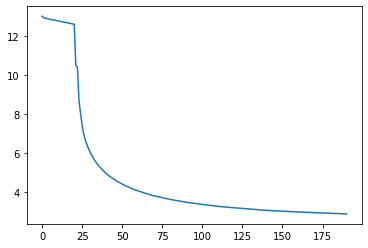

In [76]:
plt.plot(np.arange(len(model2.loss_val)),model2.loss_val)

In [77]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [96]:
class TwoLayerNet3:
    def __init__(self,input_size,hidden_size,output_size,weight_decay):
        self.W = {}
        self.W['W1'] = np.random.randn(input_size,hidden_size)*weight_decay
        self.W['b1'] = np.random.randn(hidden_size)
        self.W['W2'] = np.random.randn(hidden_size,output_size)*weight_decay
        self.W['b2'] = np.random.randn(output_size)
        self.loss_val = []
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.W['W1'],self.W['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.W['W2'],self.W['b2'])
        self.loss_val = []
        self.acc_val = []
        
        self.lastLayer = SoftmaxWithLoss()
    
    def predict(self,x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    
    def loss(self,x,t):
        y = self.predict(x)
        loss = self.lastLayer.forward(y,t)
        return loss

    def numerical_gradient(self,x,t):
        f = lambda W: self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(f, self.W['W1'])
        grads['b1'] = numerical_gradient(f, self.W['b1'])
        grads['W2'] = numerical_gradient(f, self.W['W2'])
        grads['b2'] = numerical_gradient(f, self.W['b2'])
        
        return grads
    
    def gradient(self,x,t):
        self.loss(x,t)
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
        
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db
        
        return grads
    

    
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)
        acc = sum(y == t)/x.shape[0]
        return acc
    
    
    def fit(self,epochs,lr,x_train,t_train,x_val,t_val):
        for epoch in range(epochs):
            grads = self.gradient(x_train,t_train)
            self.W['W1'] -= lr*grads['W1']
            self.W['b1'] -= lr*grads['b1']
            self.W['W2'] -= lr*grads['W2']
            self.W['b2'] -= lr*grads['b2']
            print("epoch ",epoch,":=========== validation_loss",np.round(self.loss(x_val,t_val),3),"train_loss:========",np.round(self.loss(x_train,t_train),3))
            self.loss_val.append(np.round(self.loss(x_val,t_val),2))
            self.acc_val.append(np.round(self.accuracy(x_val,t_val),2))
            

In [103]:
input_size = 3
hidden_size = [4,5,6]
ouput_size = 7


[3, 4, 5, 6, 7]

In [ ]:
l

In [234]:
class MultiLayer:
    def __init__(self,input_size,hidden_size,output_size):
        hidden_size.insert(0,input_size)
        hidden_size.append(output_size)
        self.W = {}
        for i in range(len(hidden_size)-1):
            w_key = 'W'+str(i+1)
            b_key = 'b'+str(i+1)
            self.W[w_key] = np.random.randn(hidden_size[i],hidden_size[i+1])
            self.W[b_key] = np.random.randn(hidden_size[i+1])
            
        self.layers = OrderedDict()
        
        for i in range(int(len(self.W)/2-1)):
            j = i*2 
            key1 = 'Affine'+str(i+1)
            key2 = 'Relu'+str(i+1)
            w = list(self.W.keys())[j]
            b = list(self.W.keys())[j+1]
            self.layers[key1] = Affine(self.W[w],self.W[b])
            self.layers[key2] = Relu()
        
        last_num = str(int(len(self.W)/2))
        self.layers['Affine'+last_num] = Affine(self.W['W'+last_num],self.W['b'+last_num])
        self.Lastlayer = SoftmaxWithLoss()

    def predict(self,x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    def loss(self,x,t):
        y = self.predict(x)
        loss = self.Lastlayer.forward(y,t)
        return loss

    def gradient(self,x,t):
        self.loss(x,t)
        dout = 1
        dout = self.Lastlayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
        grads = {}
        for key in self.layers.keys():
            if key[:6] == 'Affine': 
                grads[key] = self.layers[key].dW
                grads[key] = self.layers[key].db        
        return grads
            

In [235]:
input_size = 3
hidden_size = [4,5,6]
output_size = 7
X = np.random.randn(10,3)
t = np.zeros((10,7))
t[:,3] = 1
layer_test = MultiLayer(input_size,hidden_size,output_size)


In [238]:
layer_test.gradient(X,t)

{'Affine1': array([ 0.01880171,  0.01196456, -0.00378566,  0.00587524]),
 'Affine2': array([-0.02987796,  0.        , -0.0287586 ,  0.01425936,  0.        ]),
 'Affine3': array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.01557995]),
 'Affine4': array([ 0.22599923,  0.12958446,  0.13765766, -0.92077859,  0.04950702,
         0.17298948,  0.20504074])}

In [136]:
layer_test.W['b1']

array([-1.46571002, -0.79036191,  0.71386249,  0.56301786])

In [139]:
Affine(np.dot(layer_test.W[w]),layer_test.W[b])

TypeError: dot() missing 1 required positional argument: 'b'

In [138]:
x = np.random.randn(10,3)
layers = OrderedDict()
for i in range(int(len(layer_test.W)/2)-1):
    j = i*2 
    key1 = 'Affine'+str(i+1)
    key2 = 'Relu'+str(i+1)
    w = list(layer_test.W.keys())[j]
    b = list(layer_test.W.keys())[j+1]
    layers[key1] = Affine(np.dot(layer_test.W[w]),layer_test.W[b])
    layers[key2] = Relu()
        

TypeError: dot() missing 1 required positional argument: 'b'

In [ ]:
layer_test.W[]

In [101]:
model3.accuracy(X_train,t_train)

0.8548035714285714

In [ ]:
class TwoLayerNet3:
    def __init__(self,input_size,hidden_size,output_size,weight_decay=1.):
        self.W = {}
        self.W['W1'] = np.random.randn(input_size,hidden_size)*weight_decay
        self.W['b1'] = np.random.randn(hidden_size)
        self.W['W2'] = np.random.randn(hidden_size,output_size)*weight_decay
        self.W['b2'] = np.random.randn(output_size)
        self.loss_val = []
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.W['W1'],self.W['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.W['W2'],self.W['b2'])
        self.loss_val = []
        self.acc_val = []
        
        self.lastLayer = SoftmaxWithLoss()
    
    def predict(self,x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    
    def loss(self,x,t):
        y = self.predict(x)
        loss = self.lastLayer.forward(y,t)
        return loss

    def numerical_gradient(self,x,t):
        f = lambda W: self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(f, self.W['W1'])
        grads['b1'] = numerical_gradient(f, self.W['b1'])
        grads['W2'] = numerical_gradient(f, self.W['W2'])
        grads['b2'] = numerical_gradient(f, self.W['b2'])
        
        return grads
    
    def gradient(self,x,t):
        self.loss(x,t)
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
        
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db
        
        return grads
    

    
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)
        acc = sum(y == t)/x.shape[0]
        return acc
    
    
    def fit(self,epochs,lr,x_train,t_train,x_val,t_val):
        for epoch in range(epochs):
            grads = self.gradient(x_train,t_train)
            self.W['W1'] -= lr*grads['W1']
            self.W['b1'] -= lr*grads['b1']
            self.W['W2'] -= lr*grads['W2']
            self.W['b2'] -= lr*grads['b2']
            print("epoch ",epoch,":=========== validation_loss",np.round(self.loss(x_val,t_val),3),"train_loss:========",np.round(self.loss(x_train,t_train),3))
            self.loss_val.append(np.round(self.loss(x_val,t_val),2))
            self.acc_val.append(np.round(self.accuracy(x_val,t_val),2))